In [1]:
import pandas as pd

In [46]:
data = pd.read_csv('../Datasets/titanic.csv')

data.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Embarked     1307 non-null   float64
 8   survived     1309 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.2 KB


In [48]:
# Calculate and interpret the mean, median, and mode for numerical variables
mean_values = data.mean()
median_values = data.median()
mode_values = data.mode().iloc[0]

print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nMode values:\n", mode_values)

Mean values:
 Passengerid    655.000000
Age             29.503186
Fare            33.281086
Sex              0.355997
sibsp            0.498854
Parch            0.385027
Pclass           2.294882
Embarked         1.492731
survived         0.261268
dtype: float64

Median values:
 Passengerid    655.0000
Age             28.0000
Fare            14.4542
Sex              0.0000
sibsp            0.0000
Parch            0.0000
Pclass           3.0000
Embarked         2.0000
survived         0.0000
dtype: float64

Mode values:
 Passengerid     1.00
Age            28.00
Fare            8.05
Sex             0.00
sibsp           0.00
Parch           0.00
Pclass          3.00
Embarked        2.00
survived        0.00
Name: 0, dtype: float64


In [49]:
# Calculate and interpret the range, variance, standard deviation, and interquartile range (IQR) for numerical variables
range_values = data.max() - data.min()
variance_values = data.var()
std_dev_values = data.std()
iqr_values = data.quantile(0.75) - data.quantile(0.25)

print("\nRange values:\n", range_values)
print("\nVariance values:\n", variance_values)
print("\nStandard Deviation values:\n", std_dev_values)
print("\nInterquartile Range (IQR) values:\n", iqr_values)


Range values:
 Passengerid    1308.0000
Age              79.8300
Fare            512.3292
Sex               1.0000
sibsp             8.0000
Parch             9.0000
Pclass            2.0000
Embarked          2.0000
survived          1.0000
dtype: float64

Variance values:
 Passengerid    142899.166667
Age               166.545235
Fare             2677.182798
Sex                 0.229438
sibsp               1.085052
Parch               0.749195
Pclass              0.701969
Embarked            0.663615
survived            0.193155
dtype: float64

Standard Deviation values:
 Passengerid    378.020061
Age             12.905241
Fare            51.741500
Sex              0.478997
sibsp            1.041658
Parch            0.865560
Pclass           0.837836
Embarked         0.814626
survived         0.439494
dtype: float64

Interquartile Range (IQR) values:
 Passengerid    654.0000
Age             13.0000
Fare            23.3792
Sex              1.0000
sibsp            1.0000
Parch          

In [50]:
# Identify missing values
missing_values = data.isnull().sum()
print("\nMissing values:\n", missing_values)


Missing values:
 Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
survived       0
dtype: int64


In [51]:
# Handle missing values by imputation or deletion
# For this example, we'll fill missing 'Age' values with the median, and 'Embarked' with the mode

# data = data['Age'].fillna(data['Age'].median())
data['Embarked'].fillna(data['Embarked'].mode()[0])


Missing values:
 Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
survived       0
dtype: int64


In [ ]:
# Drop rows where 'Cabin' is missing
data.drop(columns='Cabin', inplace=True)

# Verify missing values are handled
print("\nMissing values after handling:\n", data.isnull().sum())

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

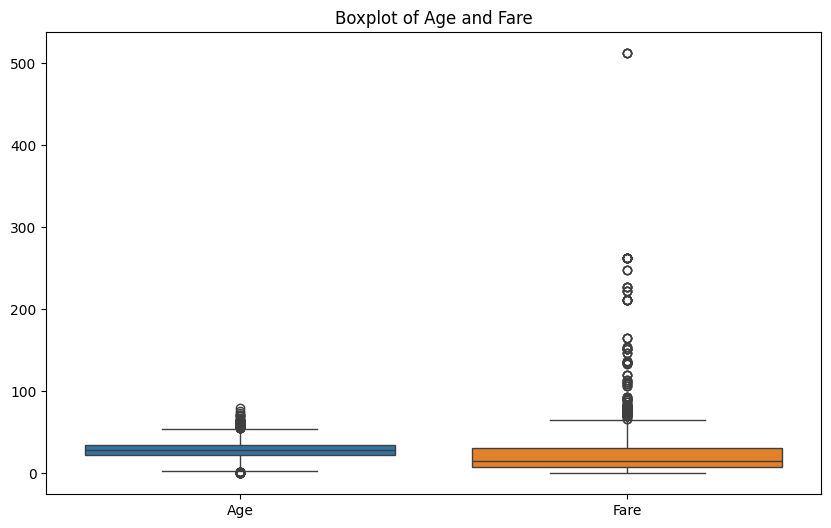

In [56]:
# Box plot for numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Age', 'Fare']])
plt.title('Boxplot of Age and Fare')
plt.show()

In [57]:
# Calculate z-scores to identify outliers
z_scores = stats.zscore(data[['Age', 'Fare']])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)
print("\nOutliers:\n", data[outliers])


Outliers:
       Passengerid   Age      Fare  Sex  sibsp  Parch  Pclass  Embarked  \
27             28  19.0  263.0000    0      3      2       1       2.0   
88             89  23.0  263.0000    1      3      2       1       2.0   
96             97  71.0   34.6542    0      0      0       1       0.0   
116           117  70.5    7.7500    0      0      0       3       1.0   
118           119  24.0  247.5208    0      0      1       1       0.0   
258           259  35.0  512.3292    1      0      0       1       0.0   
299           300  50.0  247.5208    1      0      1       1       0.0   
311           312  18.0  262.3750    1      2      2       1       0.0   
341           342  24.0  263.0000    1      3      2       1       2.0   
377           378  27.0  211.5000    0      0      2       1       0.0   
380           381  42.0  227.5250    1      0      0       1       0.0   
438           439  64.0  263.0000    0      1      4       1       2.0   
493           494  71.0   

In [58]:
# Handle outliers by capping them at the 1st and 99th percentiles
data['Age'] = np.clip(data['Age'], data['Age'].quantile(0.01), data['Age'].quantile(0.99))
data['Fare'] = np.clip(data['Fare'], data['Fare'].quantile(0.01), data['Fare'].quantile(0.99))

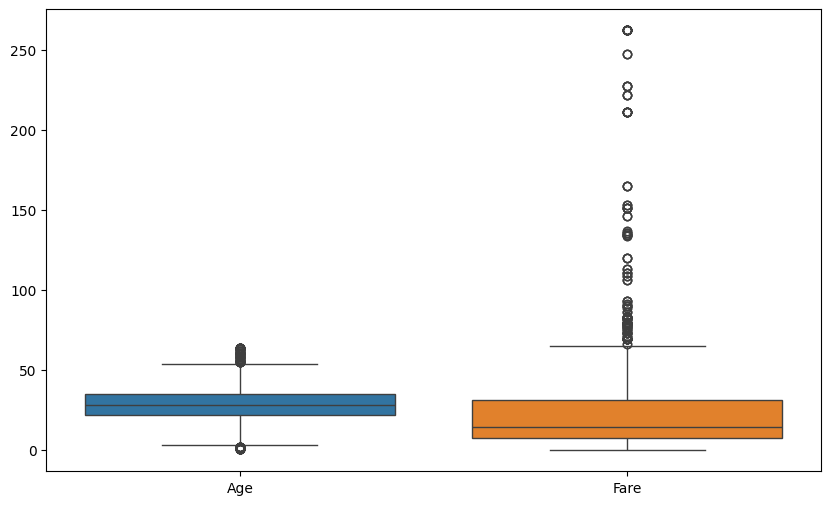

In [60]:
# Verify outliers are handled
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Age', 'Fare']])
plt.show()

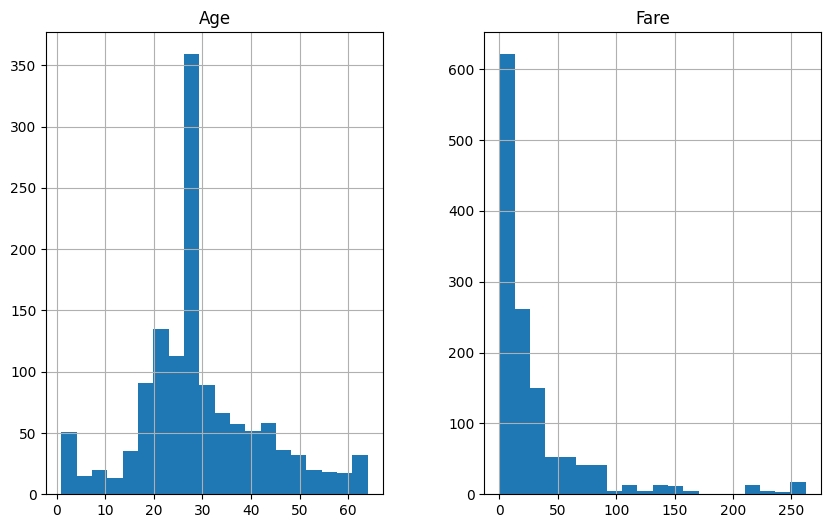

In [61]:
# Histograms for numerical variables
data[['Age', 'Fare']].hist(bins=20, figsize=(10, 6))
plt.show()

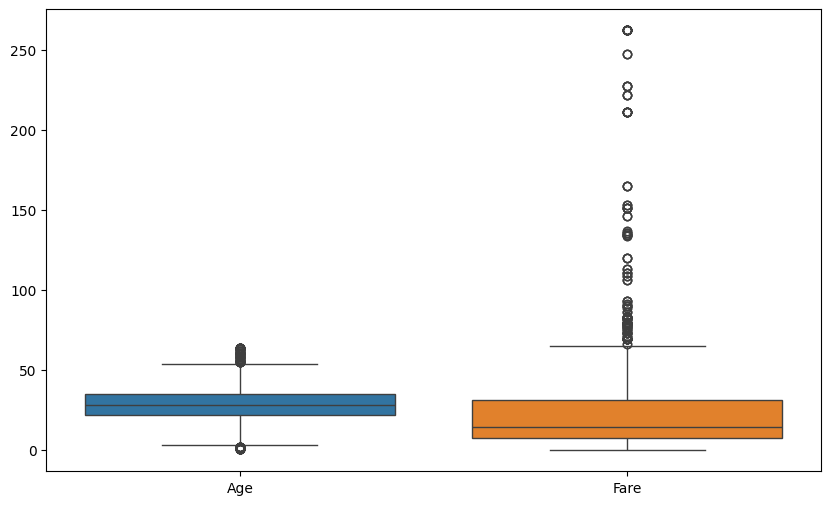

In [62]:
# Box plots for numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Age', 'Fare']])
plt.show()

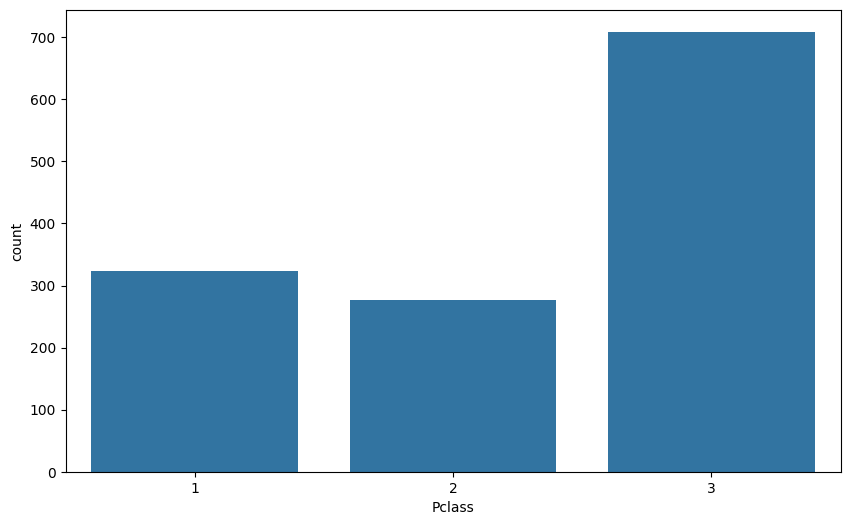

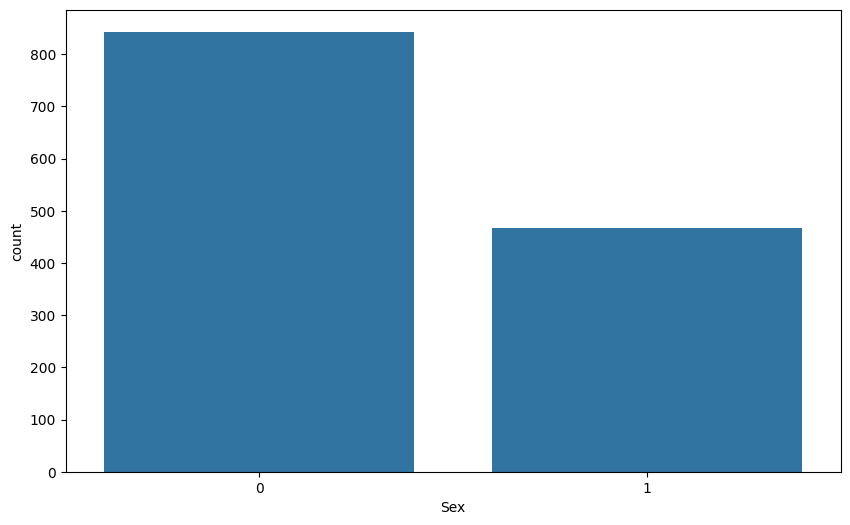

In [64]:
# Bar charts for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=data)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=data)
plt.show()

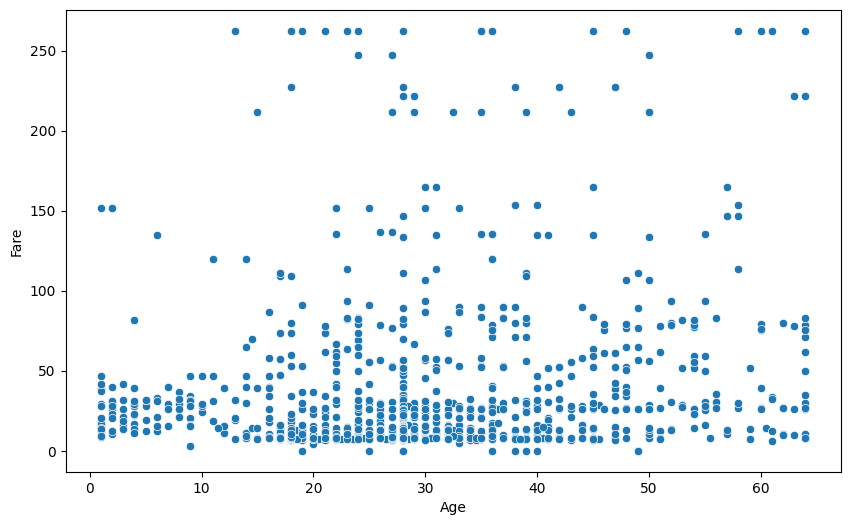

In [65]:
# Scatter plots to explore relationships between numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=data)
plt.show()

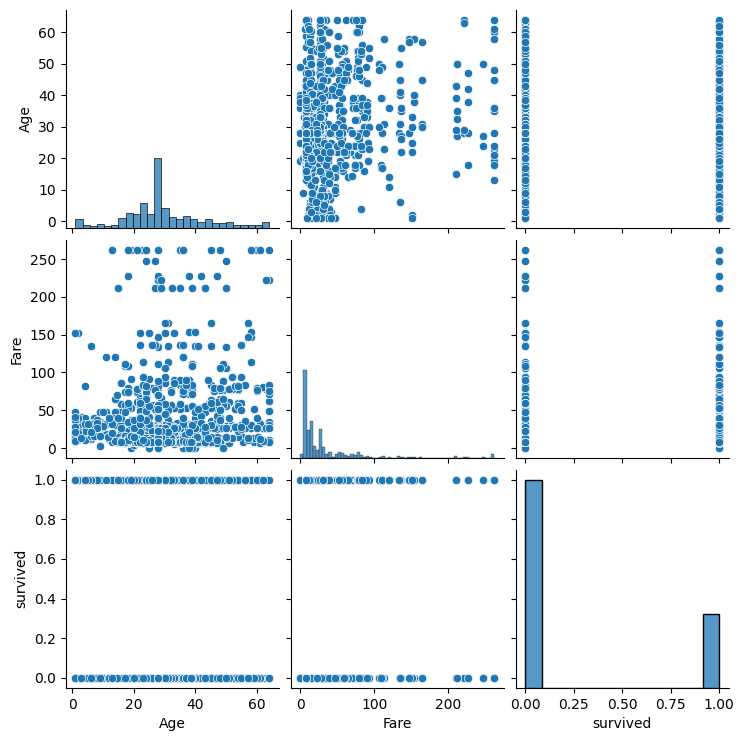

In [67]:
# Pair plots and correlation matrices for multiple variables
sns.pairplot(data[['Age', 'Fare', 'survived']])
plt.show()

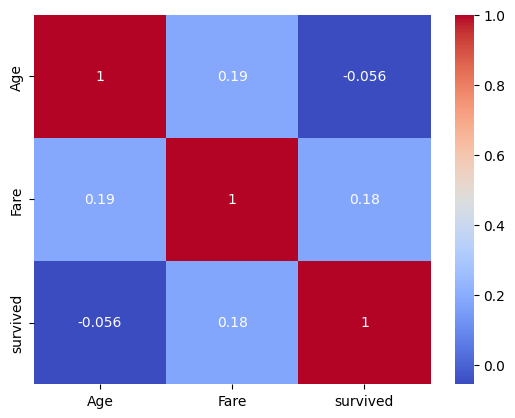

In [69]:
correlation_matrix = data[['Age', 'Fare', 'survived']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

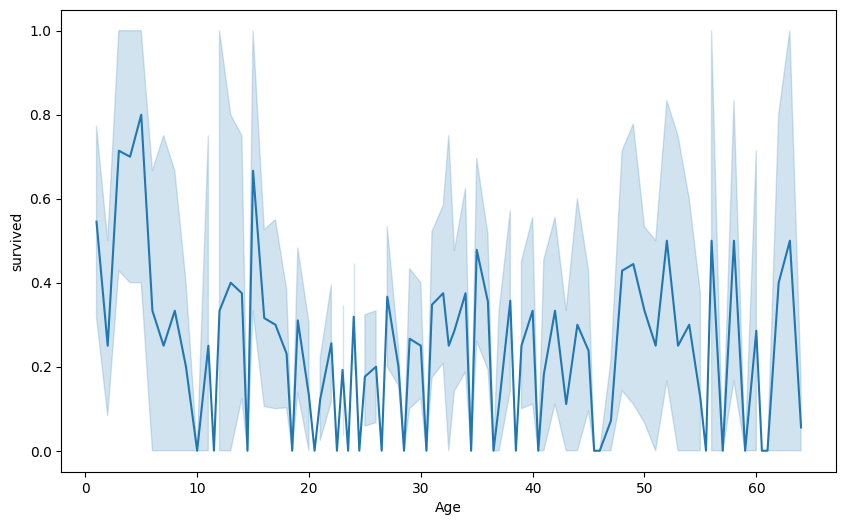

In [71]:
# Visualize trends over time or across different variables
# Example: Survival rate by age
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='survived', data=data)
plt.show()